# Object Data Only EDA, Preprocessing, and Feature Engineering
This notebook is going to focus only on the object data. I am exporting the object data that was converted to numeric data to notebook 02.1 to be used there. This notebook will be primarily for dummying the remaining columns, seeing if there is any correlation, and then deciding whether or not to include the dummies in the test and training dataframes. If I say that I am keeping the dummies, I will rerun the cell above with drop_first=True to keep with best practices.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# https://stackoverflow.com/questions/57777635/how-to-deal-with-nan-values-in-pandas-from-csv-file for help with importing NA
# Using the na_filter=False because I know from cleaning the data that all cells are filled correctly.
df_train_v5 = pd.read_csv('../datasets/cleaned_data/clean_train_v5.csv', na_filter=False)
obj_feat_df = pd.read_csv('../datasets/cleaned_data/obj_feats.csv', na_filter=False)
obj_feat_df.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,1,NA,1,Lvl,AllPub,CulDSac,1,Sawyer,RRAe,...,0,Attchd,RFn,3,3,1.0,0,NA,NA,WD
1,RL,1,NA,1,Lvl,AllPub,CulDSac,1,SawyerW,Norm,...,3,Attchd,RFn,3,3,1.0,0,NA,NA,WD
2,RL,1,NA,0,Lvl,AllPub,Inside,1,NAmes,Norm,...,0,Detchd,Unf,3,3,1.0,0,NA,NA,WD
3,RL,1,NA,0,Lvl,AllPub,Inside,1,Timber,Norm,...,0,BuiltIn,Fin,3,3,1.0,0,NA,NA,WD
4,RL,1,NA,1,Lvl,AllPub,Inside,1,SawyerW,Norm,...,0,Detchd,Unf,3,3,0.0,0,NA,NA,WD


I am first going to separate the columns that were converted to numeric columns and transfer them over to the 02.1 notebook for use with the other numeric data. 

In [3]:
obj_feat_df.isnull().sum()

MS Zoning         0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Pool QC           0
Fence             0
Misc Feature      0
Sale Type         0
dtype: int64

In [4]:
now_num = obj_feat_df._get_numeric_data()
now_num.head()

,Street,Lot Shape,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Central Air,Kitchen Qual,Functional,Fireplace Qu,Garage Qual,Garage Cond,Paved Drive,Pool QC
0,1,1,1,4,3,3,3,1,6,1,5,1,4,7,0,3,3,1.0,0
1,1,1,1,4,3,4,3,1,6,1,5,1,4,7,3,3,3,1.0,0
2,1,0,1,3,4,3,3,1,6,1,3,1,4,7,0,3,3,1.0,0
3,1,0,1,3,3,4,3,1,1,1,4,1,3,7,0,3,3,1.0,0
4,1,1,1,3,3,2,4,1,1,1,3,1,3,7,0,3,3,0.0,0


#### Model 5

Now that I have exported the numeric columns, I can remove them from the object features dataframe and start testing dummies and seeing correlations between these features and sales price.

In [5]:
obj_feat_df.drop(columns=now_num.columns, inplace=True)

In [6]:
obj_feat_df.columns

Index(['MS Zoning', 'Alley', 'Land Contour', 'Utilities', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Electrical',
       'Garage Type', 'Garage Finish', 'Fence', 'Misc Feature', 'Sale Type'],
      dtype='object')

In [7]:
df_train_v5['MS Zoning'].value_counts()

RL         1596
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

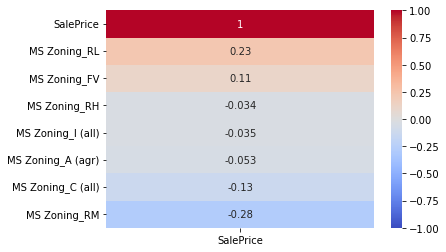

In [8]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['MS Zoning'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'MS Zoning' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

This could be useful since RM is the second most common category and has the strongest correlation, so I will rerun the cell dropping the first column.

In [9]:
df_train_v5['Alley'].value_counts()

NA      1909
Grvl      85
Pave      55
Name: Alley, dtype: int64

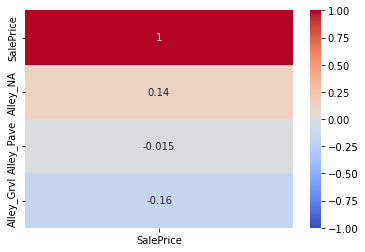

In [10]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Alley'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Alley' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

These ones can be removed since there is no really strong correlation and the two none NA columns both have very few members.

In [11]:
df_train_v5['Land Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      78
Low      43
Name: Land Contour, dtype: int64

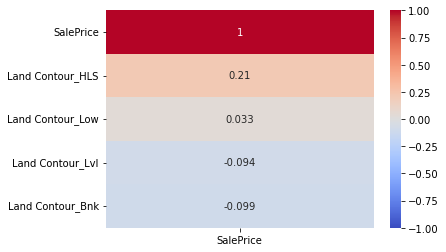

In [12]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Land Contour'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Land Contour' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

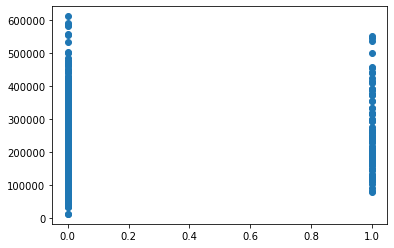

In [13]:
plt.scatter(df_train_v5['Land Contour_HLS'], df_train_v5['SalePrice']);

The range is slightly smaller if it has hills, but the other correlations aren't that strong so it is probably not worth moving forward with.

In [14]:
df_train_v5['Utilities'].value_counts()

AllPub    2047
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

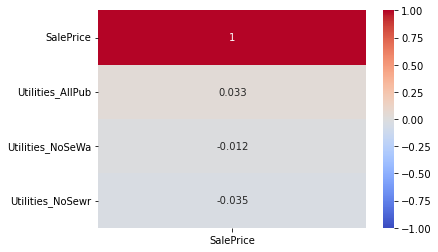

In [15]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Utilities'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Utilities' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

These columns can be dropped. There are literally only 2 rows that are different.

In [16]:
df_train_v5['Lot Config'].value_counts()

Inside     1502
Corner      347
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

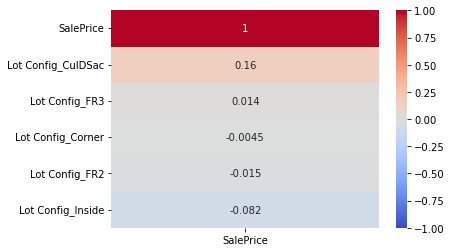

In [17]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Lot Config'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Lot Config' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

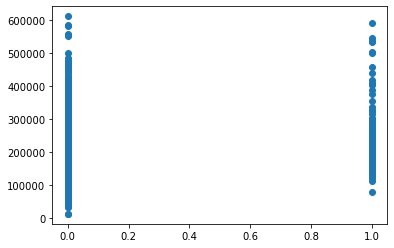

In [18]:
plt.scatter(df_train_v5['Lot Config_CulDSac'], df_train_v5['SalePrice']);

Almost everything is around 0, and looking at the scatter plot, there is not a whole lot that can be told. Being on a cul-de-sac doe keep the price above \$100,000, but the range is the same overall, so I think these dummies can be dropped.

In [19]:
obj_feat_df.columns

Index(['MS Zoning', 'Alley', 'Land Contour', 'Utilities', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Electrical',
       'Garage Type', 'Garage Finish', 'Fence', 'Misc Feature', 'Sale Type'],
      dtype='object')

In [20]:
df_train_v5['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

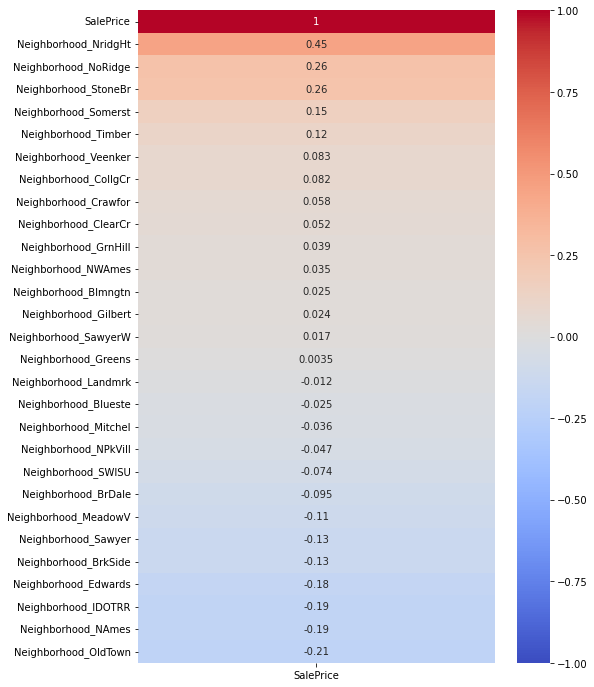

In [21]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Neighborhood'])

plt.figure(figsize=(8, 12))
dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Neighborhood' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

Definitely include because it runs a wide range of correlations. I also know that certain neighborhoods have different reputations that will definitely effect price. Keeping these dummies.

In [22]:
df_train_v5['Condition 1'].value_counts()

Norm      1766
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

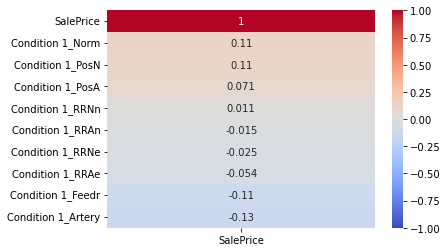

In [23]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Condition 1'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Condition 1' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

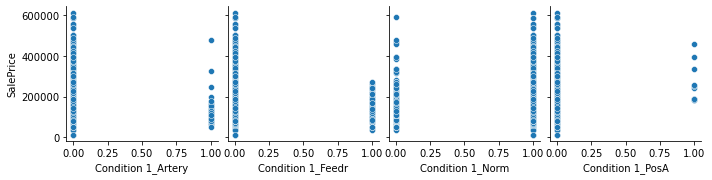

In [24]:
sns.pairplot(df_train_v5, x_vars=[i for i in df_train_v5.columns if 'Condition 1' in i][:4], y_vars='SalePrice');

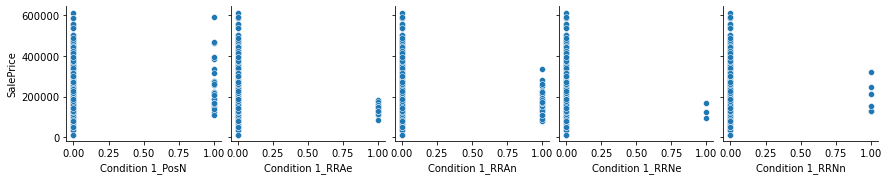

In [25]:
sns.pairplot(df_train_v5, x_vars=[i for i in df_train_v5.columns if 'Condition 1' in i][4:], y_vars='SalePrice');

There is not a strong correlation here. There are some outliers in the scatterplots, but nothing that really sticks out as to having a big effect on the model. These dummies can be dropped. 

In [26]:
df_train_v5['Condition 2'].value_counts()

Norm      2023
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

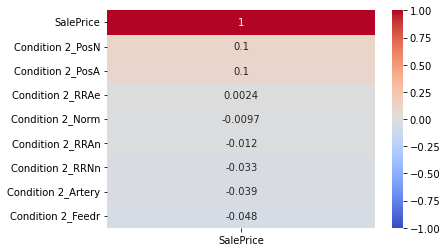

In [27]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Condition 2'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Condition 2' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

What was true for condition one is even more true for condition 2, so these dummies will also be left off.

In [28]:
df_train_v5['Bldg Type'].value_counts()

1Fam      1698
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

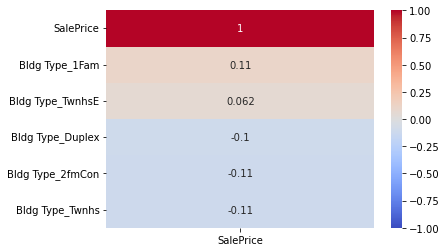

In [29]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Bldg Type'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Bldg Type' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

I am leaving these columns in because there seems to be an even split since the magnitude for all but townhouse end units is right at .1, which is interesting.

In [30]:
df_train_v5['House Style'].value_counts()

1Story    1058
2Story     597
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

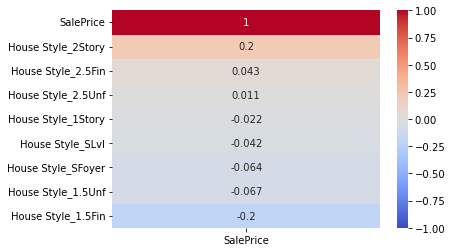

In [31]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['House Style'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'House Style' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

House style is addressed by square footage of each floor on the numeric side, so this is redundant.

In [32]:
df_train_v5['Roof Style'].value_counts()

Gable      1619
Hip         395
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

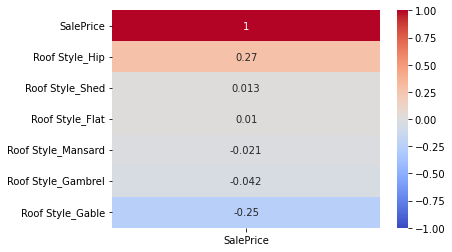

In [33]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Roof Style'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Roof Style' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

This has the strongest correlations yet, and the strongest negative correlation has the majority of rows, so it is definitely staying.

In [34]:
obj_feat_df.columns

Index(['MS Zoning', 'Alley', 'Land Contour', 'Utilities', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Electrical',
       'Garage Type', 'Garage Finish', 'Fence', 'Misc Feature', 'Sale Type'],
      dtype='object')

In [35]:
df_train_v5['Roof Matl'].value_counts()

CompShg    2024
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
Name: Roof Matl, dtype: int64

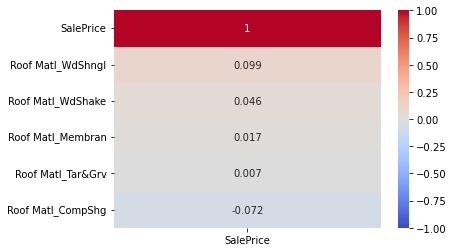

In [36]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Roof Matl'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Roof Matl' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

There is no correlation here, thus it can be dropped.

In [37]:
df_train_v5['Exterior 1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     89
BrkFace     64
WdShing     45
AsbShng     33
Stucco      26
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

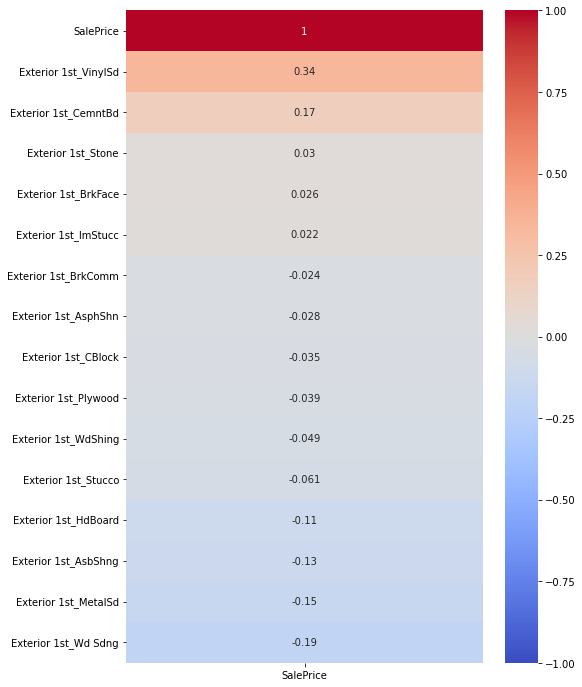

In [38]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Exterior 1st'])

plt.figure(figsize=(8,12))
dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Exterior 1st' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

The spread of rows amongst each label and the spread of correlations warrant keeping these dummies.

In [39]:
df_train_v5['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     89
Wd Shng     63
BrkFace     34
Stucco      29
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

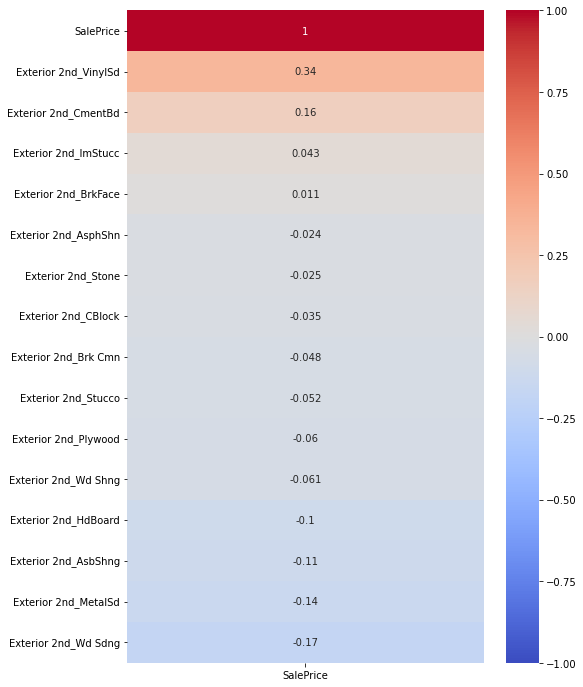

In [40]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Exterior 2nd'])

plt.figure(figsize=(8,12))
dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Exterior 2nd' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

The counts and spread for both Exterior 1 and Exterior 2 are almost identical. It is worth keeping for now and seeing if they can be combined in some way to be more effective. I am not going to drop the first column just yet since I may be multiplying them later and that would cause some issues if both sets of dummies were missing a column.

In [41]:
df_train_v5['Mas Vnr Type'].value_counts()

None       1240
BrkFace     630
Stone       166
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

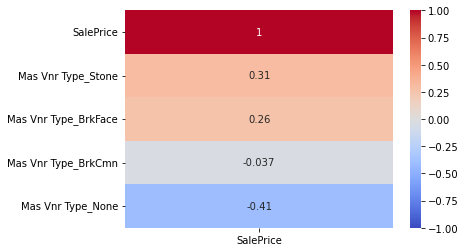

In [42]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Mas Vnr Type'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Mas Vnr Type' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

Keeping this because it has the strongest correlation that is also the majority of the data. Plus I want to look and see how the other masonry vaneer features interact with this one.

In [43]:
df_train_v5['Foundation'].value_counts()

PConc     924
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

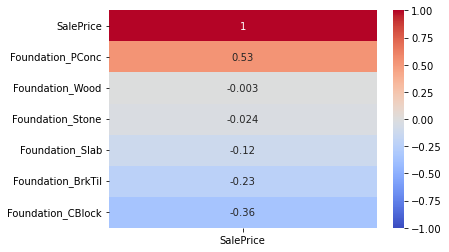

In [44]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Foundation'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Foundation' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

Keeping these due to the correlation spread and the distribution of rows.

In [45]:
df_train_v5['Heating'].value_counts()

GasA    2016
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

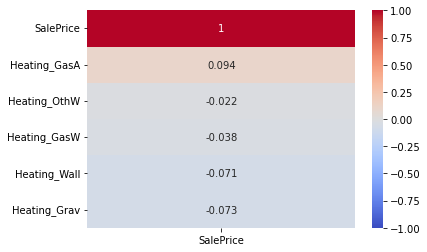

In [46]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Heating'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Heating_' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

No real correlation of any kind, so these can be dropped. 

In [47]:
obj_feat_df.columns

Index(['MS Zoning', 'Alley', 'Land Contour', 'Utilities', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Electrical',
       'Garage Type', 'Garage Finish', 'Fence', 'Misc Feature', 'Sale Type'],
      dtype='object')

In [48]:
df_train_v5['Electrical'].value_counts()

SBrkr    1866
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

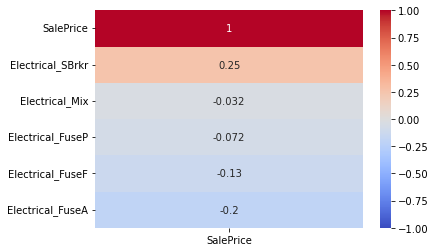

In [49]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Electrical'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Electrical' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

A decent correlation range, but the spread of rows amongst the labels makes me think that this is not that important. 

In [50]:
df_train_v5['Garage Type'].value_counts()

Attchd     1211
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

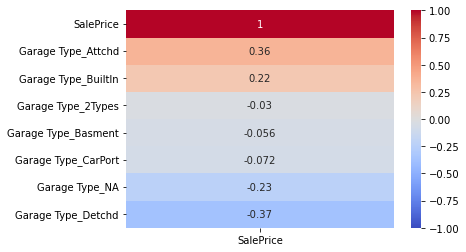

In [51]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Garage Type'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Garage Type' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

Garages seem to have a major impact on price, especially if they are detatched. It's odd that a detatched has a stronger negative correlation than not having a garage at all. Keeping for now.

In [52]:
df_train_v5['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    507
NA     114
Name: Garage Finish, dtype: int64

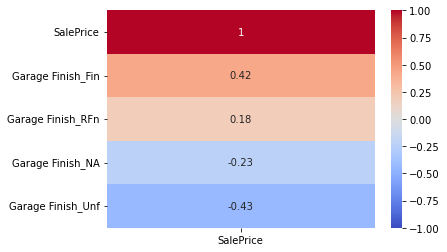

In [53]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Garage Finish'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Garage Finish' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

If the garage is unfinished, it really brings down the price, so we're leaving it in for now. 

In [54]:
df_train_v5['Fence'].value_counts()

NA       1649
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

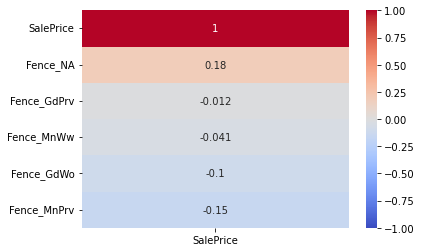

In [55]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Fence'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Fence' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

There doesn't seem to be much of a correlation here because there is the good and minimum adjectives attached to these features, and there is no pattern, so I am leaving it off. 

In [56]:
df_train_v5['Misc Feature'].value_counts()

NA      1985
Shed      56
Gar2       4
Othr       3
TenC       1
Name: Misc Feature, dtype: int64

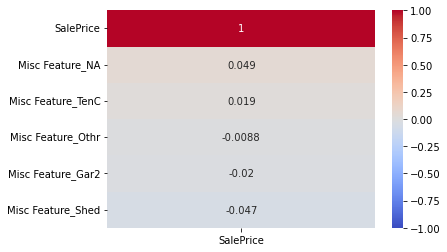

In [57]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Misc Feature'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Misc Feature' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

The miscellaneous feature has no correlation to price, which is odd because I figured something unique would add to the price. I will drop these dummies. 

In [58]:
df_train_v5['Sale Type'].value_counts()

WD       1781
New       158
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

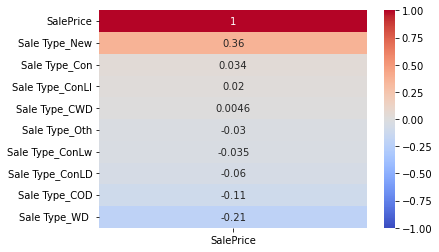

In [59]:
df_train_v5 = pd.get_dummies(df_train_v5,columns=['Sale Type'])

dummies = df_train_v5[['SalePrice'] + [i for i in df_train_v5.columns if 'Sale Type' in i]].corr()
sns.heatmap(dummies.sort_values('SalePrice', ascending=False)[['SalePrice']],
            vmin=-1, vmax=1, cmap='coolwarm', annot=True);

The strongest correlation is addressed by year built and remodeled. The majority of the other correlations are around 0. The bottom two correlations are the vast majority of the sales, so I am going to keep it in for now. 

After looking at the correlations for all the dummy columns, I am keeping the following for further analysis: 
'MS Zoning', 'Neighborhood', 'Bldg Type', 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Garage Type', 'Garage Finish', and 'Sale Type'. I am setting up the next version of the dataframe to include only these dummies. 

In [60]:
df_train_v5_1 = pd.read_csv('../datasets/cleaned_data/clean_train_v5.csv', na_filter=False)

In [61]:
# Adding all of the dummy columns that I will look at.
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['MS Zoning'], drop_first=True)
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['Neighborhood'], drop_first=True)
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['Bldg Type'], drop_first=True)
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['Roof Style'], drop_first=True)
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['Exterior 1st'], drop_first=True)
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['Exterior 2nd'])
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['Mas Vnr Type'])
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['Foundation'], drop_first=True)
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['Garage Type'], drop_first=True)
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['Garage Finish'], drop_first=True)
df_train_v5_1 = pd.get_dummies(df_train_v5_1,columns=['Sale Type'], drop_first=True)
df_train_v5_1.shape

(2049, 177)

In [62]:
# Create list of dummy features
ms_zone_list= [i for i in df_train_v5_1.columns if 'MS Zoning' in i]
neighborhood_list= [i for i in df_train_v5_1.columns if 'Neighborhood' in i]
bldg_type_list= [i for i in df_train_v5_1.columns if 'Bldg Type' in i]
roof_style_list= [i for i in df_train_v5_1.columns if 'Roof Syle' in i]
exterior_1_list= [i for i in df_train_v5_1.columns if 'Exterior 1st' in i]
exterior_2_list= [i for i in df_train_v5_1.columns if 'Exterior 2nd' in i]
mas_vnr_type_list= [i for i in df_train_v5_1.columns if 'Mas Vnr Type' in i]
foundation_list= [i for i in df_train_v5_1.columns if 'Foundation' in i]
garage_type_list= [i for i in df_train_v5_1.columns if 'Garage Type' in i]
garage_finish_list= [i for i in df_train_v5_1.columns if 'Garage Finish' in i]
sale_type_list= [i for i in df_train_v5_1.columns if 'Sale Type' in i]
master_list= ms_zone_list+neighborhood_list+bldg_type_list+roof_style_list+exterior_1_list+exterior_2_list+mas_vnr_type_list+foundation_list+garage_type_list+garage_finish_list+sale_type_list

In [63]:
master_list

['MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_IDOTRR',
 'Neighborhood_Landmrk',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkComm',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CBlock',
 'Exterior 1st_CemntBd',
 'Exterior 1st_H

Now that I have all the dummies created and a list of all the dummies for each column, I am going to run a train test split and cross val score on all of them and see what happens. I will then look at the coefficients to see what could be dropped.

In [64]:
X = df_train_v5_1[master_list]
y = df_train_v5_1['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2010)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [65]:
linreg.score(X_train, y_train)

0.7222007932715272

In [66]:
linreg.score(X_test, y_test)

0.6428973860366405

In [67]:
cross_val_score(linreg, X_train, y_train).mean()

-1.3297757007784402e+22

No matter what random state I try, they almost always end up like this, where the training score seems goo, the test score has high variance but is ok bias wise, but the cross val is basically zero. This kind of makes sense because these are all dummy columns and you can't get that much from dummies.

In [68]:
df_train_v5_1.to_csv('../datasets/cleaned_data/clean_train_v6.csv', index=False)
df_train_v5_1[master_list+['Id']].to_csv('../datasets/cleaned_data/dummy_cols.csv', index=False)

# Next Steps
I have created dummies for the features I think would be good. Since I can't get good testing done with just dummies, I am going to migrate everything over to the combo notebook, number 02.3 and begin narrowing things down over there. Once I have narrowed it down enough, I will submit my final model and finalize everything else for this project. 